<a href="https://colab.research.google.com/github/afifahsalsa/PCVK_Genap_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

# Konvolusi tanpa library

In [4]:
def convolution2d(image, kernel, stride, padding):

  #masukkan padding ke dalam gambar input
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape #dimensi kernel
  padded_height, padded_width = image.shape #dimensi gambar yg sudah dipadd

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_img = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_img[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_img

**Operasi Sharpen**

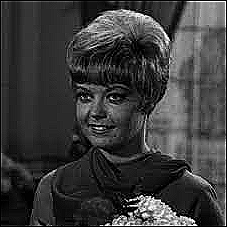

In [5]:
img = cv.imread('/content/drive/MyDrive/female.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

output = convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(output)

**Operasi Emboss**

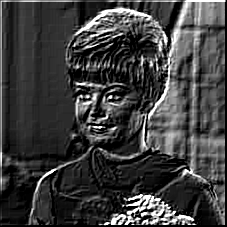

In [6]:
img = cv.imread('/content/drive/MyDrive/female.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

output = convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(output)

**Operasi Left Sobel Edge Detection**

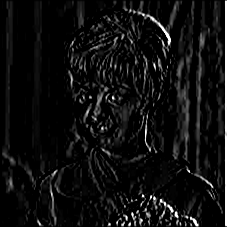

In [7]:
img = cv.imread('/content/drive/MyDrive/female.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])

output = convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(output)

**Operasi Canny Edge Detection**

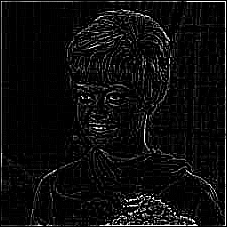

In [8]:
img = cv.imread('/content/drive/MyDrive/female.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])

output = convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(output)

**Operasi Prewitt Edge Detection**

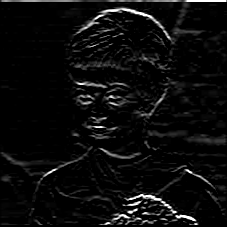

In [9]:
img = cv.imread('/content/drive/MyDrive/female.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])

output = convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(output)

**Operasi 5x5 Gaussian Blur**

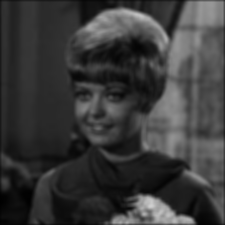

In [10]:
img = cv.imread('/content/drive/MyDrive/female.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

**21x21 Gaussian Blur**

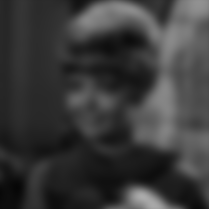

In [11]:
img = cv.imread('/content/drive/MyDrive/female.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))